# imports 

In [9]:
import pandas as pd
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae

# Assignment 1: Rolling Average

1. Plot a line chart of the raw PowerConsumption_Zone1 series. This represents electricity consumption in KwH.
2. Then, calculate a 1 week (7 * 24) period moving average and plot.
3. Finally, calculate a 30-day (30 * 24) period moving average and plot.
4. Are there any unusual or unexpected patterns in the data?

In [2]:
electricity_df = pd.read_csv(
    "data/powerconsumption.csv",
    usecols=["PowerConsumption_Zone1", "Datetime"],
    index_col=["Datetime"],
    parse_dates=["Datetime"]
).resample("H").mean()

electricity_df.head()

,PowerConsumption_Zone1
Datetime,
2017-01-01 00:00:00,29197.974683
2017-01-01 01:00:00,24657.215190
2017-01-01 02:00:00,22083.037973
2017-01-01 03:00:00,20811.139240
2017-01-01 04:00:00,20475.949367


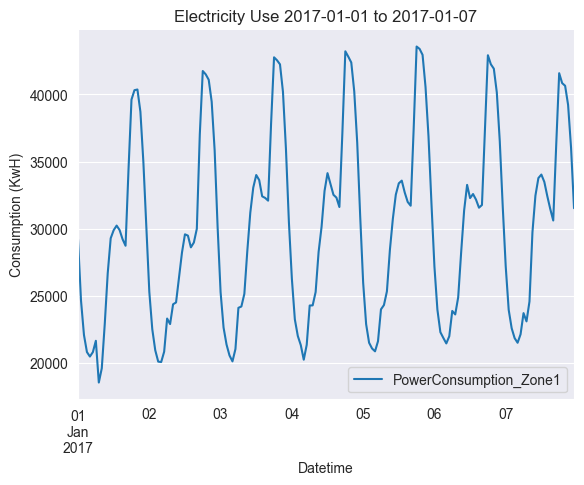

In [3]:
electricity_df[:168].plot(ylabel="Consumption (KwH)", title="Electricity Use 2017-01-01 to 2017-01-07")
sns.despine()

<AxesSubplot:xlabel='Datetime'>

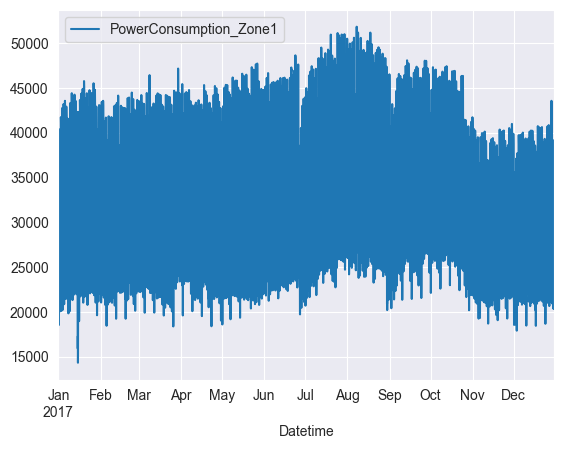

In [4]:
electricity_df.plot()

## weekly rolling avg

<AxesSubplot:xlabel='Datetime'>

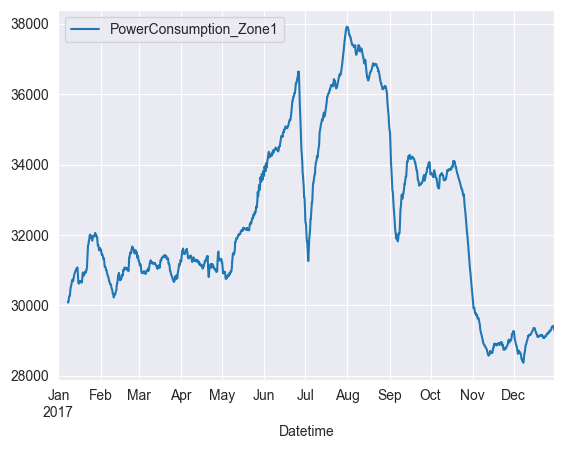

In [6]:
weekly_df = electricity_df.rolling(24*7).mean()
weekly_df.plot()

## monthly rolling avg

<AxesSubplot:xlabel='Datetime'>

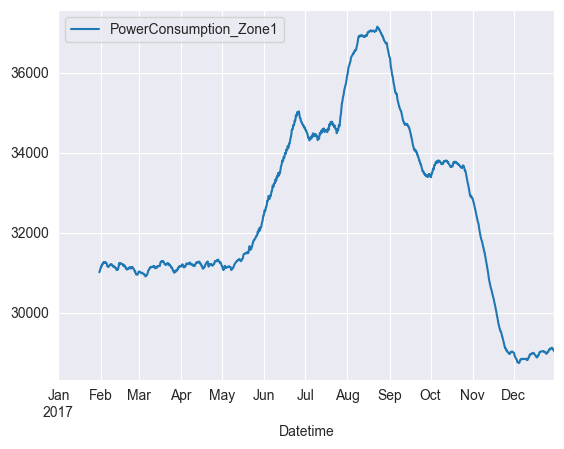

In [7]:
monthly_df = electricity_df.rolling(24*30).mean()
monthly_df.plot()

## resample by month

Just get all values by month

[]

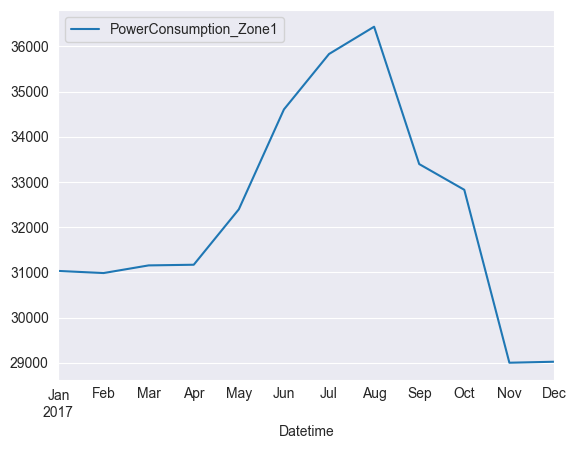

In [8]:
by_month_df = electricity_df.resample("M").mean().plot()
by_month_df.plot()

# decomposition 

In [4]:
taco_stands_df = pd.read_csv("data/taco_stands.csv", parse_dates=["Date"])
taco_stands_df.head(5)

,Date,Taco Stands in LA
0,2010-01-01,12
1,2010-02-01,15
2,2010-03-01,15
3,2010-04-01,19
4,2010-05-01,24


<AxesSubplot:xlabel='Date'>

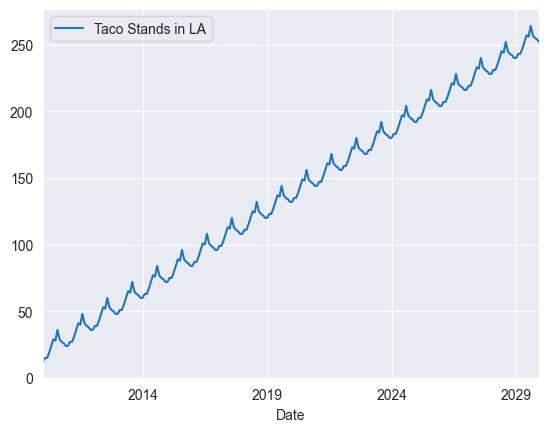

In [5]:
taco_stands_df.set_index('Date').plot()

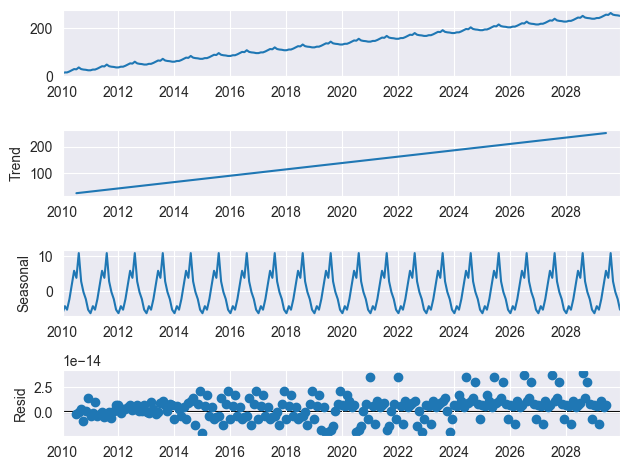

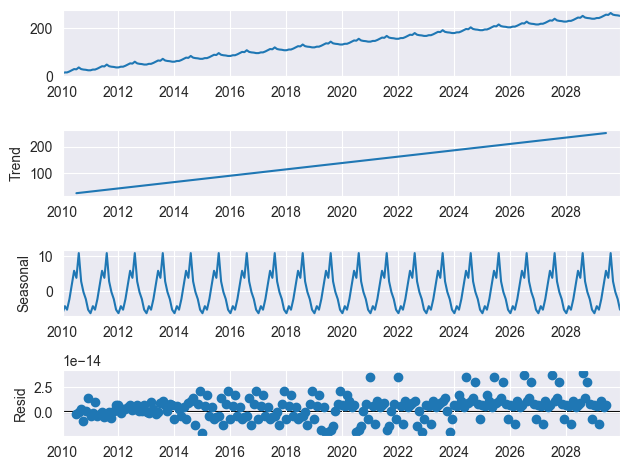

In [7]:
seasonal_decompose(taco_stands_df.set_index('Date')).plot()

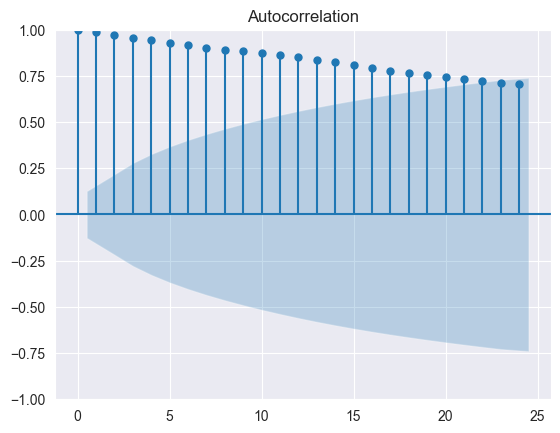

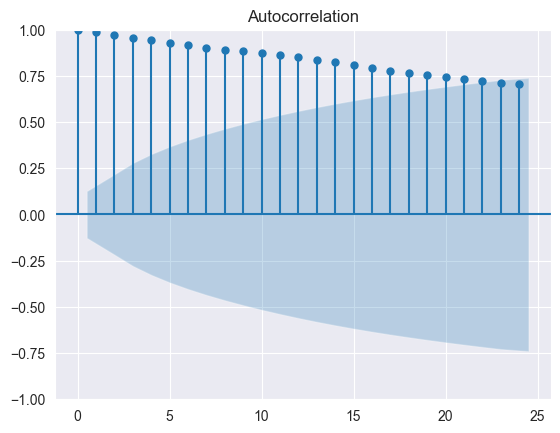

In [14]:
plot_acf(taco_stands_df.set_index('Date'))

In [19]:
taco_stands_diff_df = taco_stands_df.assign(
    differenced=taco_stands_df['Taco Stands in LA'].diff()
).set_index('Date')[1:]

taco_stands_diff_df

,Taco Stands in LA,differenced
Date,,
2010-02-01,15,3.0
2010-03-01,15,0.0
2010-04-01,19,4.0
2010-05-01,24,5.0
2010-06-01,29,5.0
...,...,...
2029-08-01,264,8.0
2029-09-01,257,-7.0
2029-10-01,255,-2.0


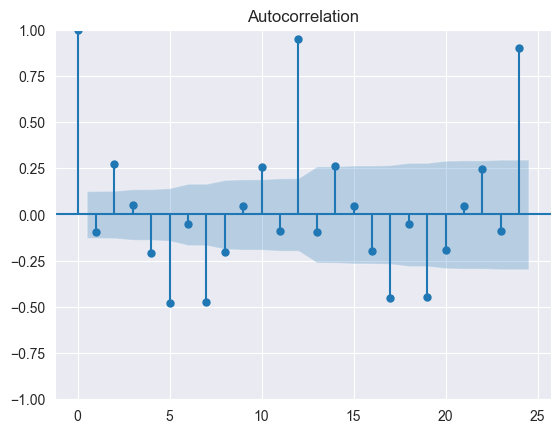

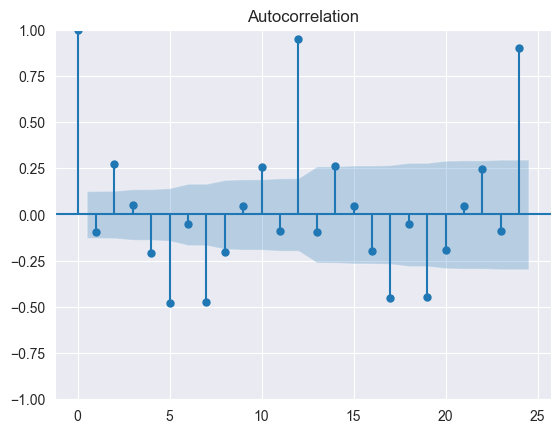

In [20]:
plot_acf(taco_stands_diff_df['differenced'])

# Assignment 2: Decomposition

1. Plot the entire Madrid weather dataset, then try decomposing it. Then, try filtering the data down to the first 168 rows (1 week) and review the results. Fit an ACF chart on the hourly data to assess seasonal correlations.

2. Then, decompose the monthly average temperature series, `monthly_weather`. How does it differ from a daily decomposition? Then, fit an ACF chart on the monthly data to assess seasonal correlations.

## Hourly Dataset Creation

In [12]:
hourly_weather = (
    pd.read_csv(
        "data/madrid_weather.csv",
        usecols=["time", "temperature"],
        parse_dates=["time"],
        index_col="time")
)

hourly_weather.head()

,temperature
time,
2019-01-01 00:59:00,3.1
2019-01-01 01:59:00,2.9
2019-01-01 02:59:00,3.1
2019-01-01 03:59:00,1.9
2019-01-01 04:59:00,0.7


<Axes: xlabel='time'>

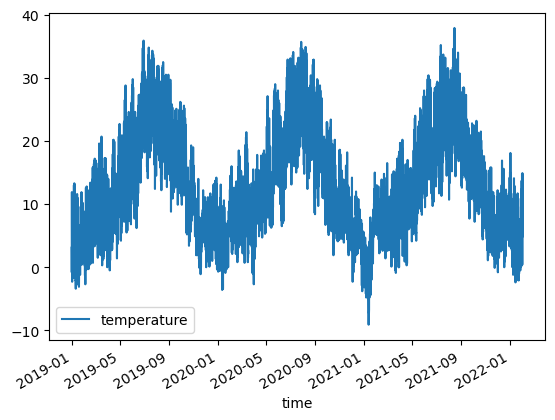

In [4]:
hourly_weather.plot()

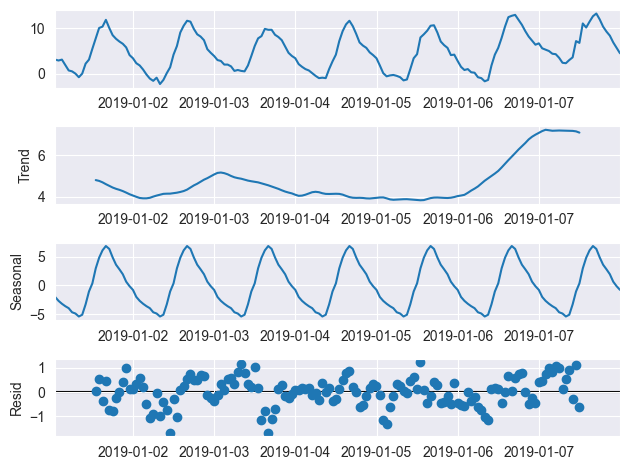

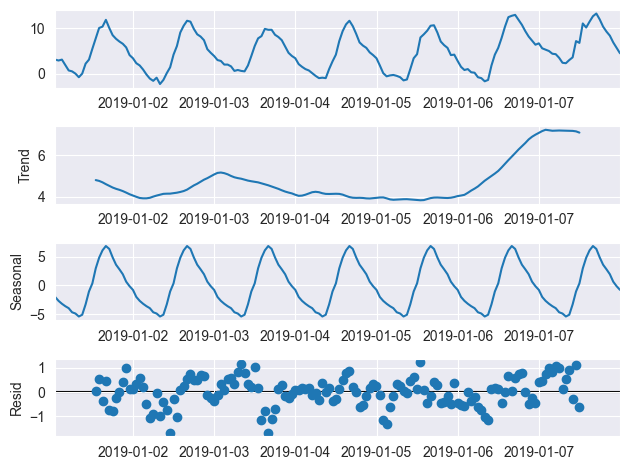

In [21]:
hourly_weather_1week = hourly_weather[:168]
seasonal_decompose(hourly_weather_1week).plot()

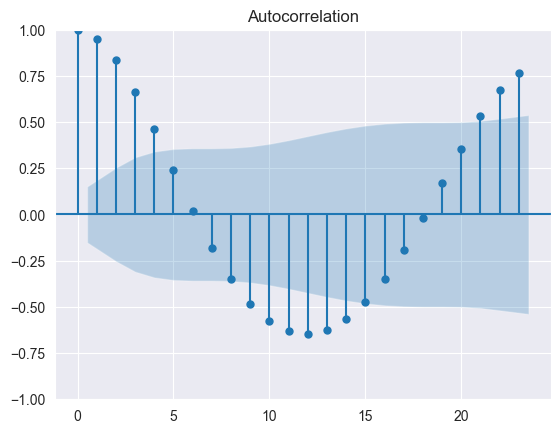

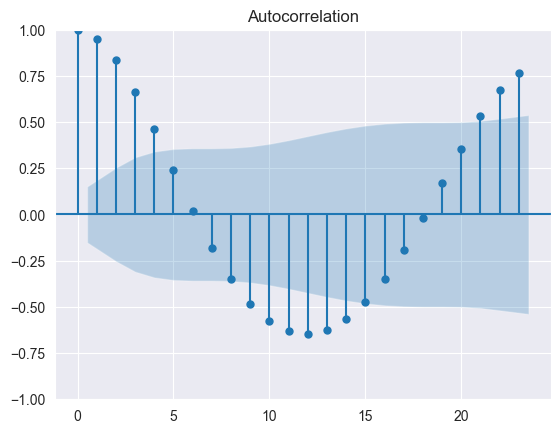

In [22]:
plot_acf(hourly_weather_1week)

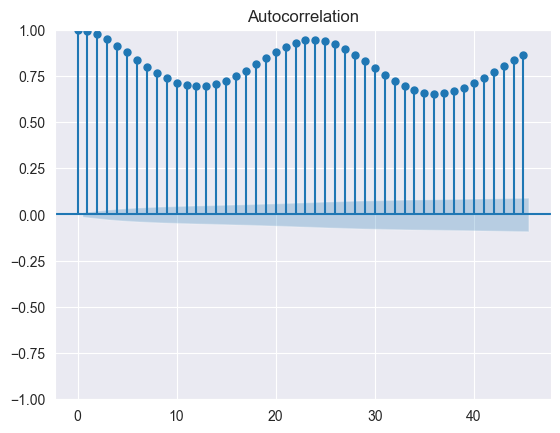

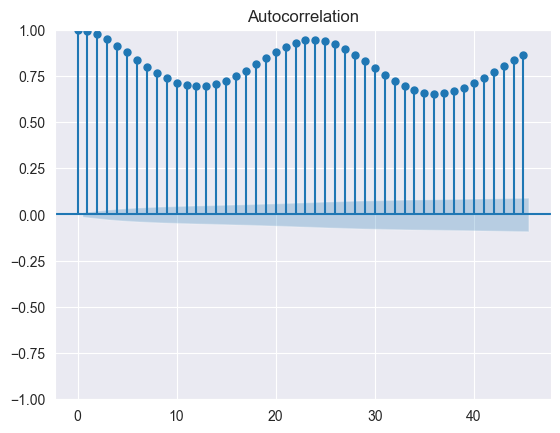

In [23]:
plot_acf(hourly_weather)

## Monthly Dataset Creation

In [24]:
monthly_weather = (
    pd.read_csv(
        "data/madrid_weather.csv", 
        usecols=["time", "temperature"],
        parse_dates=["time"],
        index_col="time")
    .resample("M")
    .mean()
)

monthly_weather.head()

,temperature
time,
2019-01-31,4.267473
2019-02-28,6.645982
2019-03-31,9.244489
2019-04-30,9.032222
2019-05-31,15.345968


<AxesSubplot:xlabel='time'>

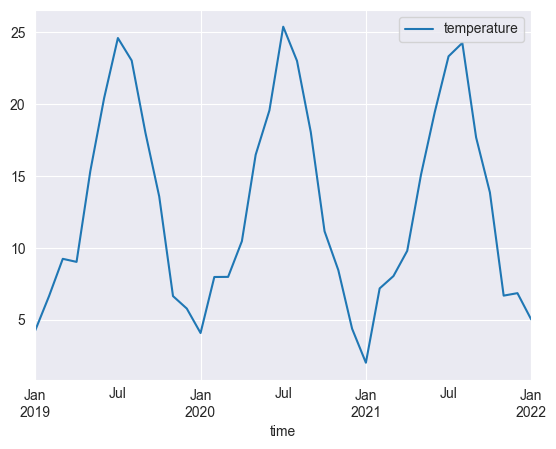

In [25]:
monthly_weather.plot()

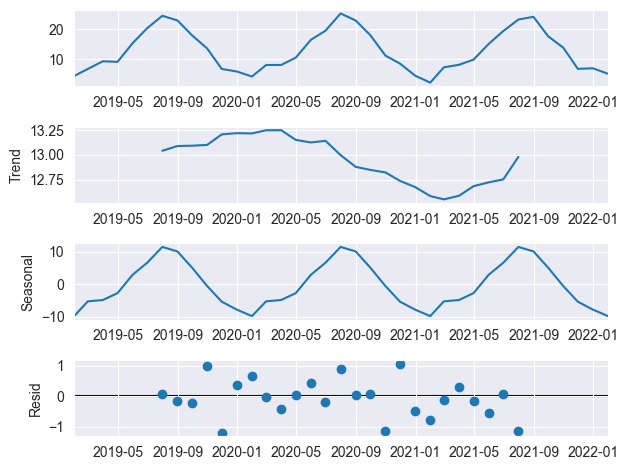

In [27]:
r = seasonal_decompose(monthly_weather)
r.plot();

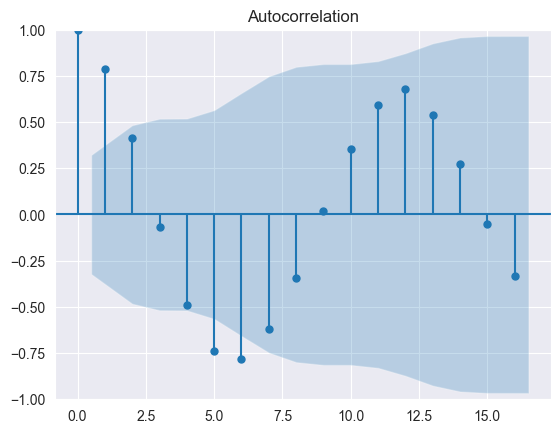

In [29]:
plot_acf(monthly_weather);

# Assignment 3: Forecasting

1. Engineer monthly dummy and trend variables, then fit a regression model and forecast two years worth of airline data (24 months).

2. Review the accuracy - and then try fitting the regression by using a log transform of the target variable.

3. Next, fit a Facebook Prophet model and compare the accuracy of Prophet to your Linear Regression model.

In [11]:
air_traffic = pd.read_csv("../Data/AirPassengers.csv", parse_dates=["Month"])

air_traffic.head()

,Month,Passengers (k)
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


<Axes: xlabel='Month'>

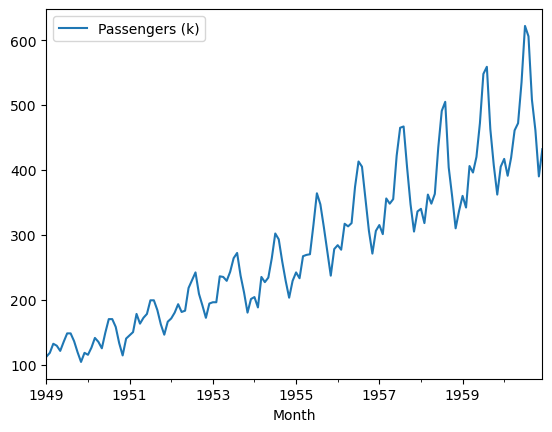

In [12]:
air_traffic.set_index("Month").plot()

### Linear Regression Feature

In [13]:
# Create Features here 


In [14]:
# Data Splitting 


In [15]:
# Model Fitting


In [16]:
# Calculate Forecast Accuracy


In [17]:
# Plot Performance


### Facebook Prophet

In [18]:
air_traffic = pd.read_csv("../Data/AirPassengers.csv", parse_dates=["Month"])

air_traffic.head()

,Month,Passengers (k)
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [19]:
## Rename Columns


In [20]:
# split data


In [22]:
# Fit Prophet Model


In [ ]:
# Build Forecast


In [ ]:
# Decomposition


In [ ]:
# Plot Performance


In [23]:
# Calculate Error Metrics
